<a href="https://colab.research.google.com/github/manikur/DevSecOp/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Weather Classification
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv('/content/weather_data_balanced.csv')

In [ ]:
df.head(10)

,Temperature,Humidity,Air_Pressure,Wind_Speed,Weather_Condition
0,25.07,10.01,998.89,0.44,Sunny
1,29.62,76.66,988.91,1.22,Rainy
2,7.83,69.00,952.23,36.70,Stormy
3,15.87,79.70,972.47,18.17,Cloudy
4,29.75,61.68,1039.54,29.21,Partly Cloudy
5,32.34,30.89,984.42,6.62,Sunny
6,27.14,85.16,998.11,14.92,Rainy
7,3.80,93.78,972.99,34.20,Stormy
8,22.98,62.53,1005.02,18.22,Cloudy
9,17.64,62.40,1010.91,14.76,Partly Cloudy


In [ ]:
#Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        4000 non-null   float64
 1   Humidity           4000 non-null   float64
 2   Air_Pressure       4000 non-null   float64
 3   Wind_Speed         4000 non-null   float64
 4   Weather_Condition  4000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 156.4+ KB


In [ ]:
df.describe()

,Temperature,Humidity,Air_Pressure,Wind_Speed
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,20.025558,59.970545,992.175127,18.634073
std,9.271277,23.570839,18.325582,12.680434
min,0.000000,10.010000,950.010000,0.000000
25%,13.315000,39.980000,979.070000,9.582500
50%,19.900000,63.010000,992.020000,15.275000
75%,26.622500,77.887500,1005.175000,24.800000
max,39.980000,99.960000,1039.910000,49.940000


In [ ]:
df['Weather_Condition'].value_counts()

,count
Weather_Condition,
Sunny,800
Rainy,800
Stormy,800
Cloudy,800
Partly Cloudy,800


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Air_Pressure,0
Wind_Speed,0
Weather_Condition,0


In [ ]:
df.duplicated().sum()

np.int64(0)

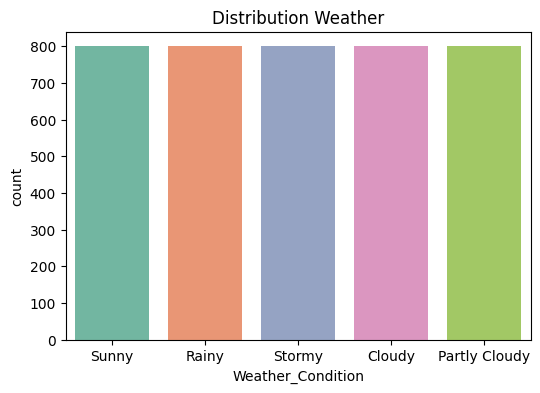

In [ ]:
# Label Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Weather_Condition', data=df, palette='Set2')
plt.title("Distribution Weather")
plt.show()

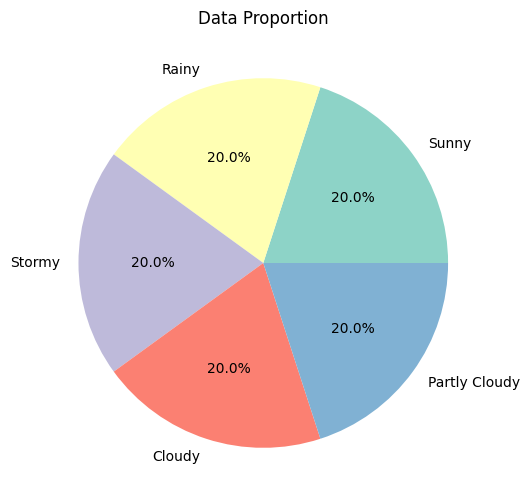

In [ ]:
# Pie Chart
plt.figure(figsize=(6,6))
df['Weather_Condition'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Data Proportion")
plt.ylabel('')
plt.show()

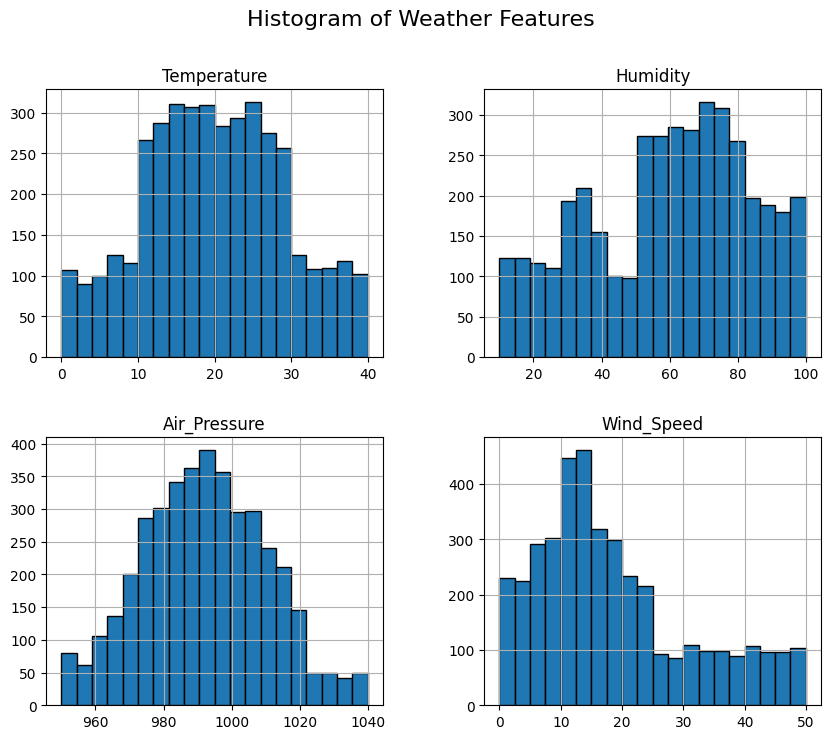

In [ ]:
# Histogram
df.drop(columns='Weather_Condition').hist(bins=20, figsize=(10,8), edgecolor='black')
plt.suptitle("Histogram of Weather Features", fontsize=16)
plt.show()

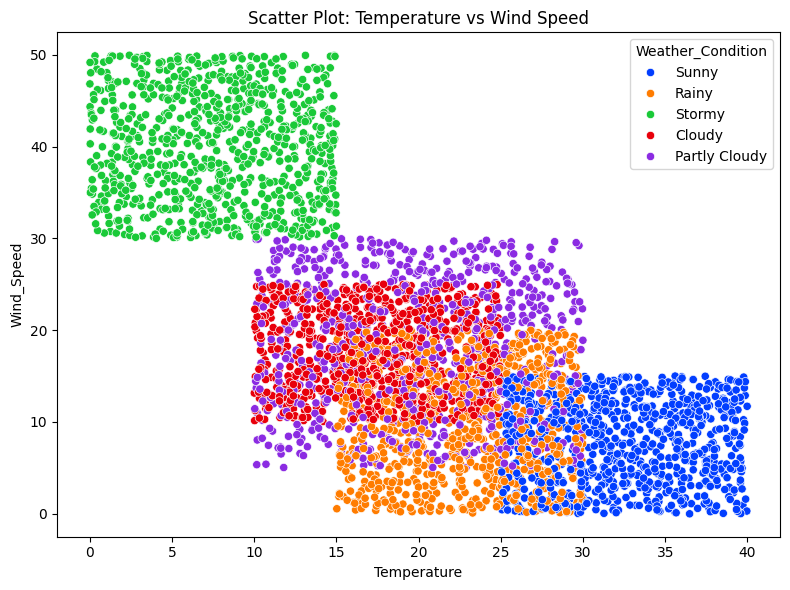

In [ ]:
# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature', y='Wind_Speed', hue='Weather_Condition', palette="bright")
plt.title("Scatter Plot: Temperature vs Wind Speed")
plt.tight_layout()
plt.show()

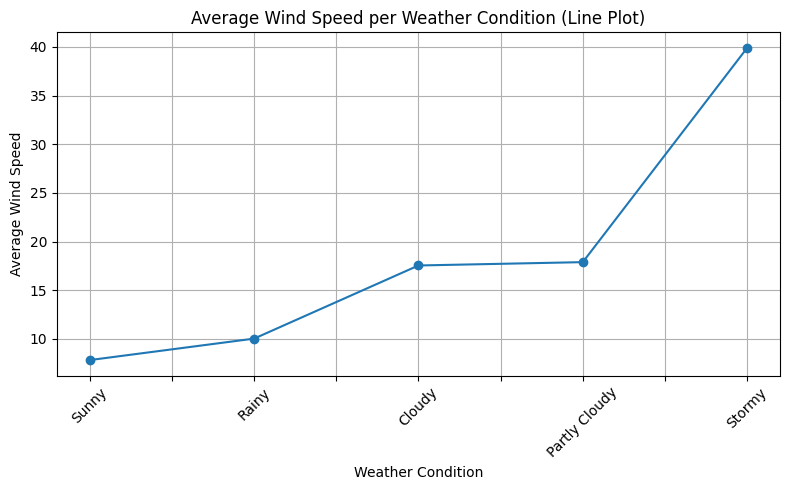

In [ ]:
# Line Plot
wind_speed_mean = df.groupby('Weather_Condition')['Wind_Speed'].mean().sort_values()
plt.figure(figsize=(8,5))
wind_speed_mean.plot(kind='line', marker='o', color='tab:blue')
plt.title("Average Wind Speed per Weather Condition (Line Plot)")
plt.ylabel("Average Wind Speed")
plt.xlabel("Weather Condition")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

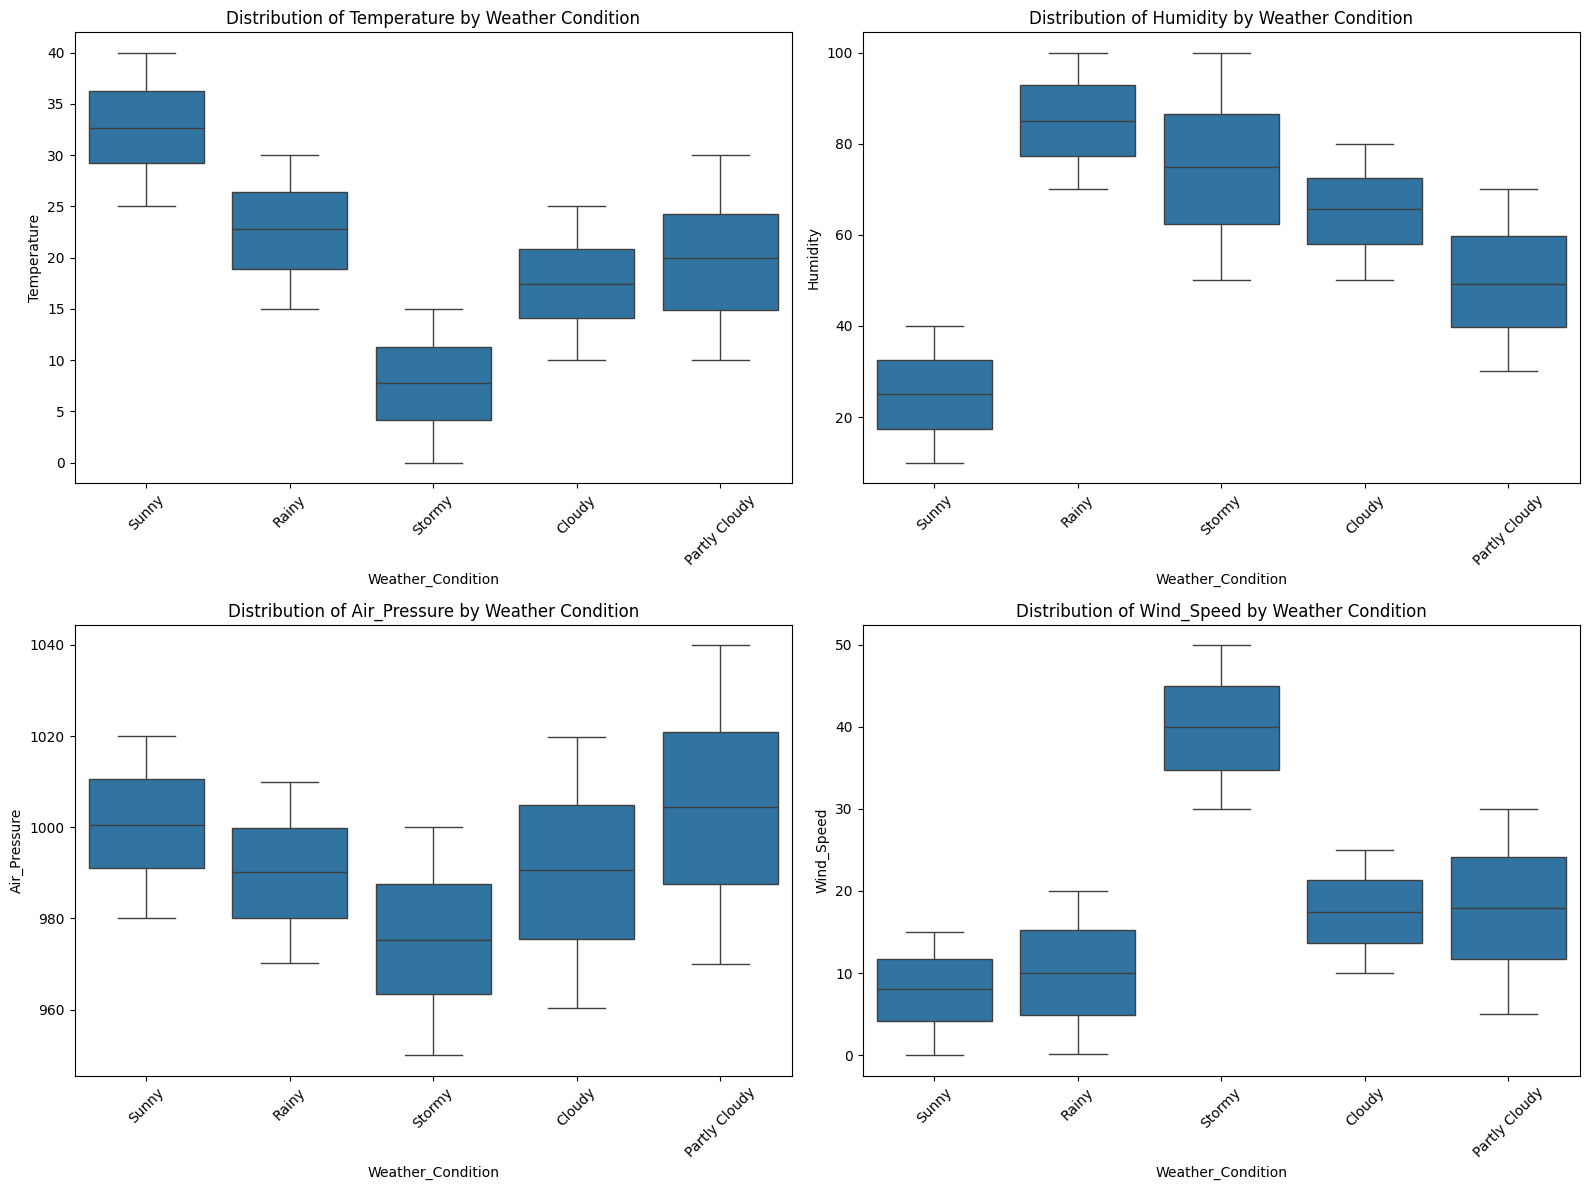

In [ ]:
# Boxplot
features = ['Temperature', 'Humidity', 'Air_Pressure', 'Wind_Speed']
plt.figure(figsize=(16,12))
for i, feat in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Weather_Condition', y=feat, data=df,
                order=df['Weather_Condition'].value_counts().index)
    plt.title(f"Distribution of {feat} by Weather Condition")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
feat

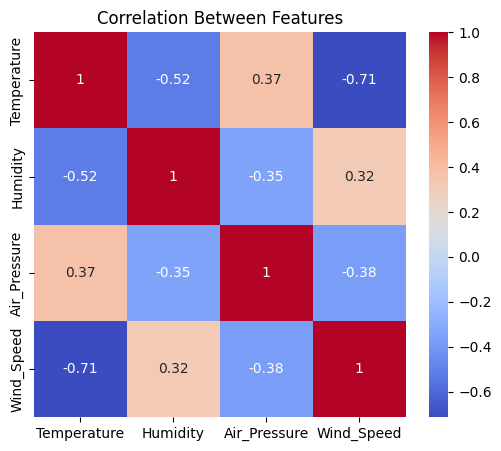

In [ ]:
# Correlation
plt.figure(figsize=(6,5))
sns.heatmap(df.drop(columns='Weather_Condition').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

#Preprocessing

In [ ]:
# Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['Weather_Condition'])

In [ ]:
# Features & Target
X = df[['Temperature', 'Humidity', 'Air_Pressure', 'Wind_Speed']]
y = df['label']

In [ ]:
# Feature Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Modeling

In [ ]:
def evaluate_model(model, model_name):
    print(f"=== {model_name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return model, acc

# SVM

=== SVM (Linear Kernel) ===
Accuracy: 0.8788
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       160
           1       0.79      0.70      0.74       160
           2       0.92      0.95      0.94       160
           3       1.00      1.00      1.00       160
           4       0.97      0.99      0.98       160

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



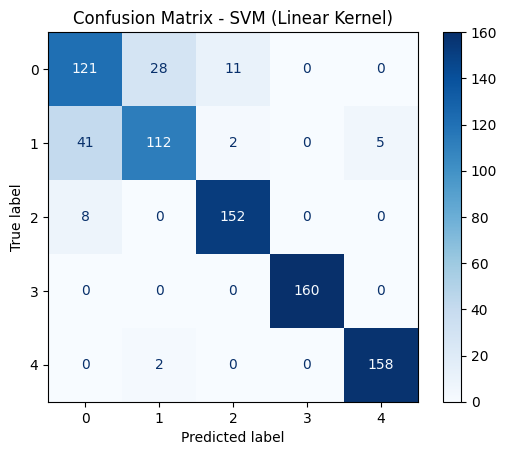

In [ ]:
svc = svm.SVC(kernel='linear', probability=True, random_state=42)
svc, svc_acc = evaluate_model(svc, "SVM (Linear Kernel)")

# Random Fores

=== Random Forest ===
Accuracy: 0.9300
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       160
           1       0.96      0.81      0.87       160
           2       0.94      0.94      0.94       160
           3       1.00      1.00      1.00       160
           4       0.98      0.99      0.99       160

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



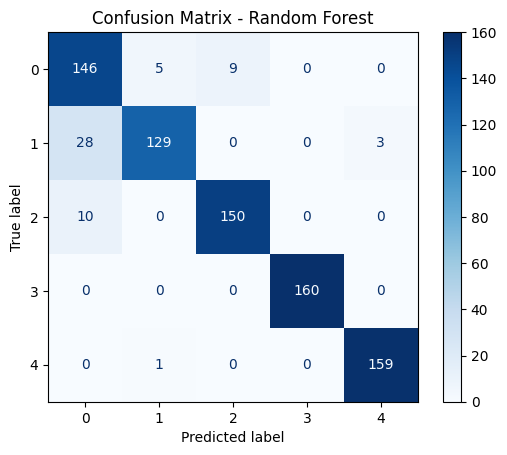

In [ ]:
#Random Fores
rf = RandomForestClassifier(random_state=42)
rf, rf_acc = evaluate_model(rf, "Random Forest")

# Decision Tree

=== Decision Tree ===
Accuracy: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       160
           1       0.84      0.82      0.83       160
           2       0.96      0.94      0.95       160
           3       1.00      1.00      1.00       160
           4       0.98      0.99      0.99       160

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



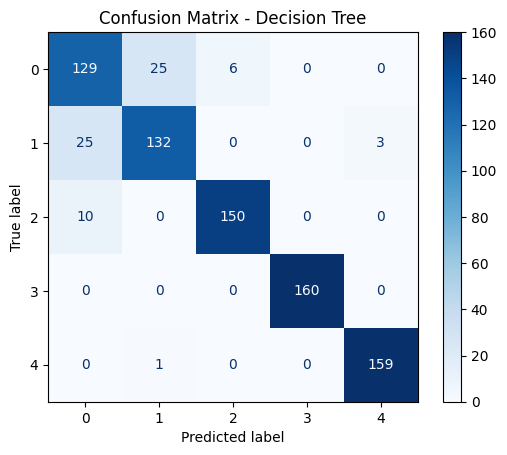

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt, dt_acc = evaluate_model(dt, "Decision Tree")

# K-NN

=== K-Nearest Neighbors ===
Accuracy: 0.8950
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       160
           1       0.86      0.72      0.78       160
           2       0.93      0.94      0.93       160
           3       1.00      1.00      1.00       160
           4       0.96      1.00      0.98       160

    accuracy                           0.90       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.90      0.90      0.89       800



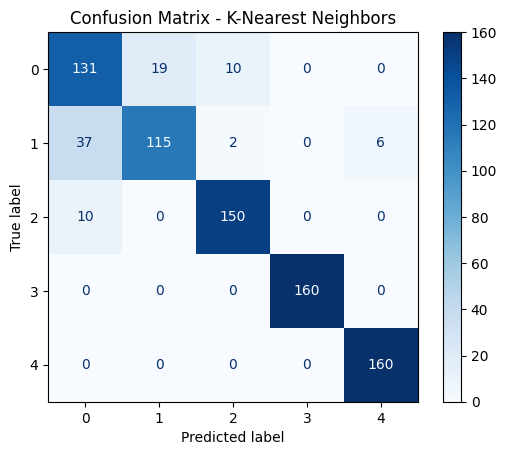

In [ ]:
knn = KNeighborsClassifier()
knn, knn_acc = evaluate_model(knn, "K-Nearest Neighbors")

#Model Comparison

In [ ]:
accuracy_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy': [svc_acc, rf_acc, dt_acc, knn_acc]
}).sort_values(by='Accuracy', ascending=False)

print("=== Model Accuracy Comparison ===")
print(accuracy_df.to_string(index=False))

=== Model Accuracy Comparison ===
        Model  Accuracy
Random Forest   0.93000
Decision Tree   0.91250
          KNN   0.89500
          SVM   0.87875


# ROC Curves

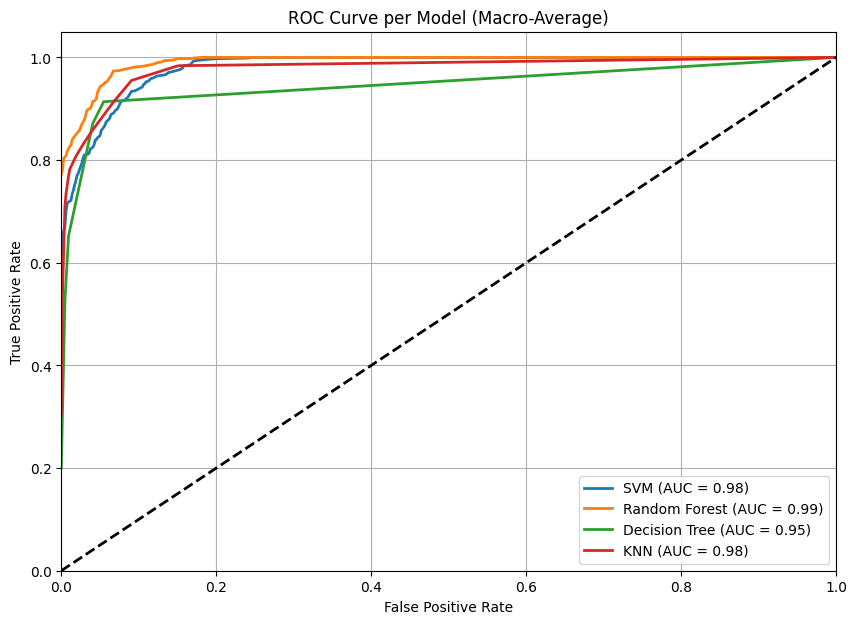

In [ ]:
# Get number of classes
n_classes = len(le.classes_)  # make sure 'le' is the LabelEncoder you used
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Function to plot ROC curve for each model
def plot_roc_per_model(model, name):
    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot the macro-average ROC curve
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'{name} (AUC = {roc_auc["macro"]:.2f})', lw=2)

# Plot ROC curves for all models
plt.figure(figsize=(10, 7))
plot_roc_per_model(svc, "SVM")
plot_roc_per_model(rf, "Random Forest")
plot_roc_per_model(dt, "Decision Tree")
plot_roc_per_model(knn, "KNN")

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Model (Macro-Average)')
plt.legend(loc="lower right")
plt.grid()
plt.show()